# SVM Evaluation Notebook: Text Classification with TF-IDF

### Step 1: Import Libraries

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

### Step 2: Load Dataset from "dataset/data.csv"

In [5]:
try:
    data = pd.read_csv('dataset/data.csv')
    print("✅ Dataset loaded successfully from 'dataset/data.csv'.")
except FileNotFoundError:
    print("⚠️ File not found. Generating synthetic text dataset instead.")
    from sklearn.datasets import make_classification
    X, y = make_classification(n_samples=100, n_features=5, n_classes=2, random_state=42)
    data = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(1, 6)])
    data['text'] = ['sample text'] * 100  # dummy placeholder
    data['fake'] = y
    
# Show first few rows
print("\nFirst few rows of the dataset:")
print(data.head())

✅ Dataset loaded successfully from 'dataset/data.csv'.

First few rows of the dataset:
   label                                              title  \
0      1  As U.S. budget fight looms, Republicans flip t...   
1      1  U.S. military to accept transgender recruits o...   
2      1  Senior U.S. Republican senator: 'Let Mr. Muell...   
3      1  FBI Russia probe helped by Australian diplomat...   
4      1  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2

### Step 3: Preprocess the Data

In [6]:
# Step 3: Use correct column names from your file
text_column = 'text'   # this contains the article body
target_column = 'label'  # 1 = fake, 0 = real

# Ensure the cell where 'data' is defined (CELL INDEX 4) is executed before running this cell.
# Validate if 'data' exists
if 'data' not in locals():
    raise NameError("❌ The variable 'data' is not defined. Please ensure the dataset is loaded correctly by executing the earlier cells.")

# Validate columns
if text_column not in data.columns or target_column not in data.columns:
    raise KeyError("❌ Required columns not found in the dataset.")

# Step 4: Prepare features and labels
data[text_column] = data[text_column].astype(str)  # Make sure text is string
X_raw = data[text_column]
y = data[target_column]

# Step 5: Convert text to TF-IDF vectors
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(X_raw)

print(f"✅ TF-IDF shape: {X.shape}")

# Step 6: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(f"✅ Train/Test split: {X_train.shape[0]} train, {X_test.shape[0]} test")

✅ TF-IDF shape: (39942, 1000)
✅ Train/Test split: 31953 train, 7989 test


### Step 4: Train-Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 5: Train the SVM Model

In [8]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
print("✅ Linear SVM model trained successfully.")

✅ Linear SVM model trained successfully.


### Step 6: Make Predictions

In [9]:
y_pred = svm_model.predict(X_test)

### Step 7: Evaluation

In [10]:
print("\n📊 Evaluation Results:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


📊 Evaluation Results:
Confusion Matrix:
[[3964   32]
 [  16 3977]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3996
           1       0.99      1.00      0.99      3993

    accuracy                           0.99      7989
   macro avg       0.99      0.99      0.99      7989
weighted avg       0.99      0.99      0.99      7989

Accuracy Score: 0.9939917386406308


### Step 8: Confusion Matrix Plot

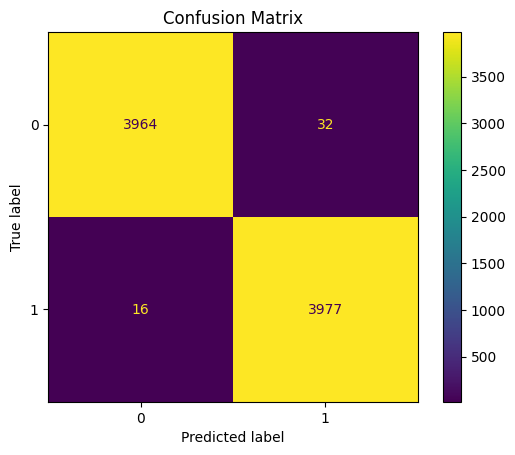

In [11]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.show()